<a href="https://colab.research.google.com/github/kyj0701/Round_Robin_Scheduler/blob/master/ganttchart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
myfile = files.upload()

Saving input.txt to input.txt


In [99]:
f = open(file='/content/input.txt')
line = f.readline()
num_process = 0
while line:
  process = line.split(' ')
  print(process[0],process[1],process[2])
  
  line = f.readline()
  num_process = num_process+1

print(num_process)

0 3 5

1 0 4

2 1 1

3 5 3

4 3 7

5 8 2

6


In [139]:
f2 = open(file='/content/input.txt')
line = f2.readline()
arr = [[0]*3 for _ in range(num_process)]
while line:
  for i in range(0,num_process):
    for j in range(0,3):
      process = line.split(' ')
      arr[i][j] = process[j].strip()
    line = f2.readline()

print(arr)

[['0', '3', '5'], ['1', '0', '4'], ['2', '1', '1'], ['3', '5', '3'], ['4', '3', '7'], ['5', '8', '2']]


In [140]:
w_time = 0
for k in range(0,num_process):
  w_time = w_time + int(arr[k][2])

print(w_time)


22


In [141]:
time_quantum = int(input('time_quantum : '))
print(time_quantum)

time_quantum : 3
3


time quantum :  3
[[(0, 3), (15, 2)], [(3, 3), (17, 1)], [(6, 1)], [(7, 3)], [(10, 3), (18, 3), (21, 1)], [(13, 2)]]


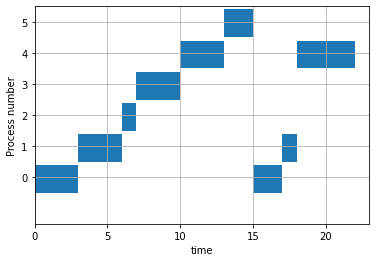

In [142]:

# Importing the matplotlb.pyplot
import matplotlib.pyplot as plt
  
# Declaring a figure "gnt"
fig, gnt = plt.subplots()
  
# Setting Y-axis limits
gnt.set_ylim(0, 10*(num_process+1))
  
# Setting X-axis limits
gnt.set_xlim(0, w_time+1)
  
# Setting labels for x-axis and y-axis
gnt.set_xlabel('time')
gnt.set_ylabel('Process number')

num_arr = [0]*num_process  
for i in range(0,num_process):
  num_arr[i] = i

tick_arr = [0]*num_process
for j in range(0,num_process):
  tick_arr[j] = 15+10*j

# Setting ticks on y-axis
gnt.set_yticks(tick_arr)
# Labelling tickes of y-axis
gnt.set_yticklabels(num_arr)
  
# Setting graph attribute
gnt.grid(True)

# print(arr)
print("time quantum : ", time_quantum)


arr_time = [[] for _ in range(num_process)]
i = 0

while i < w_time:
  for pn in range(0,num_process):
    
    if (int(arr[pn][2]) > time_quantum) :
      arr_time[pn].append((i,time_quantum))
      i = i + time_quantum
      arr[pn][2] = int(arr[pn][2]) - time_quantum
      # print(i)

    elif (0< int(arr[pn][2]) <= time_quantum):
      arr_time[pn].append((i,int(arr[pn][2])) )
      i = i + int(arr[pn][2])
      arr[pn][2] = 0
      # print(i)


      
print(arr_time)



for i in range(0,num_process):
  # print(arr_time[i])
  gnt.broken_barh(arr_time[i],(10+10*i, 9))


  
plt.savefig("gantt.png")
